In [993]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector
import numpy as np
#from pymavlink import mavutil
import sys
import signal
import random as rand

In [994]:
img = cv2.imread('rov_pool.jpg')

#img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
#plt.imshow(img)
cap = cv2.VideoCapture('AUV_Vid.mkv')

ret, frame = cap.read()

#cap = cv2.VideoCapture("rtsp://192.168.1.102:8554/rovcam")
#ret, frame = cap.read()
#plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))



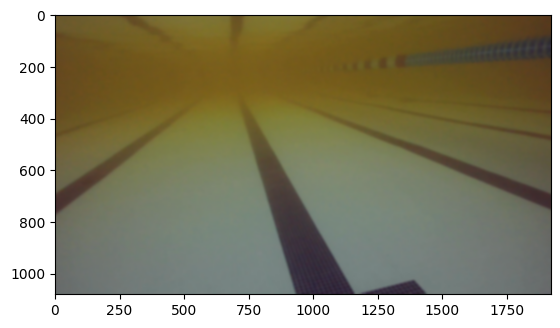

In [995]:
blurrry = cv2.GaussianBlur(img, (15, 15), cv2.BORDER_DEFAULT)
plt.imshow(blurrry)

In [996]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
    if (a_set & b_set):
        return True
    else:
        return False

In [997]:
def makegray(img):
    blur = cv2.blur(img, (10, 10))
    gray = cv2.cvtColor(blur,cv2.IMREAD_GRAYSCALE) # convert to grayscale
    return gray



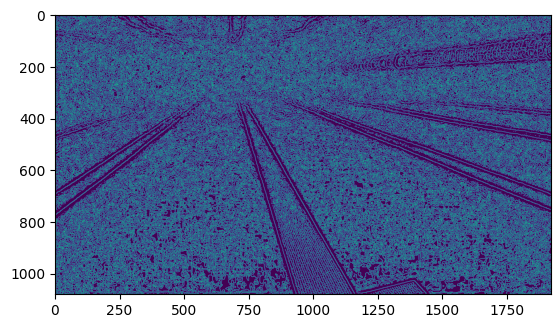

In [998]:
def detectedges(img):
    edges = cv2.Canny(img,20, 60, apertureSize=5) # detect edges
    return edges

plt.imshow(detectedges(makegray(img)))

In [999]:
'''def detectlines(edges):
    lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,        ) # detect lines
    return lines
print(detectlines(detectedges(makegray(frame))))'''
def detect_lines(img, threshold1=50, threshold2=150, apertureSize=3, minLineLength=50,maxLineGap=40):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    blur = cv2.medianBlur(gray, 23)
    edges = cv2.Canny(blur, threshold1, threshold2, apertureSize) # detect edges
    lines = cv2.HoughLinesP(edges,10,np.pi/210,70,minLineLength=270,maxLineGap=25) # detect lines
    if lines is not None:
        return((lines))
    else:
        #raise(ValueError)
        return(None)

In [1000]:
def drawlane(img, lines, colors):
    
    line = 0
    if lines is None:
            pass
    else:
        while line < len(lines):
            x1 = lines[line][0]
            x2 = lines[line][1]
            y1 = lines[line][2]
            y2 = lines[line][3]
            cv2.line(img, (x1, y1), (x2, y2), colors, 3)
            line+=1
        
    return(img)
   
def draw_lines(img, lines, colors):
    if lines is None:
            pass
    else:
        for line in lines:
            
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), colors, 5)
        
    return(img)

In [1001]:
'''def get_slopes_intercepts(lines):
    gradient1 = [None]
    gradient = []
    intercepts1 = [None]
    intercepts = []
    if lines is None:
            pass
    else:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            gradient1[0] = (y2-y1)/(x2-x1)
            intercepts1[0] = (y2/(gradient1[0]*x2))
            if common_member(gradient, gradient1) == False:
                gradient.append(gradient1[0])
                intercepts.append(intercepts1[0])
        

        
    
    return ((gradient, intercepts))
    '''

def get_slopes_intercepts(lines):
    slopes = []
    intercepts = []
    line = 0
    while line < len(lines):
        
        slope = (lines[line][0][3] - lines[line][0][2]) / (lines[line][0][1] - lines[line][0][0])
        intercept = lines[line][0][2] - slope * lines[line][0][0]
        slopes.append(slope)
        intercepts.append(intercept)
        line+=1
    return ((slopes, intercepts))


In [1002]:
#Rome did this
def get_color():
    c=rand.randint(0,255)
    b=rand.randint(0,255)
    a=rand.randint(0,255)

    return((a,b,c))

In [1003]:
#aj wrote this program lets hope it works
def detect_lanes(lines):
    lanes = []

    if lines is None:
        return None
    else:
        slopes, intercepts = get_slopes_intercepts(lines)
        for i in range(len(lines)):
            if lines[i][0][3] > len(img):
                pass
            else:
                
                for j in range(i+1, len(lines)):
                    
                    if (np.absolute(lines[i][0][0]-lines[j][0][0]) < 40) and (np.absolute(lines[i][0][1]-lines[j][0][1]) < 40):
                        break
                    if (np.absolute(lines[i][0][0]-lines[j][0][0]) >250) and (np.absolute(lines[i][0][1]-lines[j][0][1]) > 250):
                        break
                    elif np.absolute(np.abs(slopes[i] - slopes[j])) < 1:
                        lanes.append([lines[i], lines[j]])
                        i += 1 #to make sure single line isn't paired with more than one other line

    return (np.array(lanes).tolist()) 
'''def detect_lanes(lines):
    i = 0
    while i < len(lines):
        j = 0
        lane = []
        while j< i:
            m = round(get_slopes_intercepts(lines)[0][j], 1)
            a = round(get_slopes_intercepts(lines)[0][i],1)
           
            if (m <= 0.2+a or m >= a-0.2):
                lane.append([lines[j],lines[i]])
                
            j+=1
        #if eventualy going to intersect but not currently intersecting it is a lane
        
        i+=1
    return lane'''
'''
def detect_lanes(line_list):
    slopes = []
    intercepts = []
    valid_list1 = []
    valid_list2 = []
    lane_list = []
    indices = []

    for line in line_list:
       
        slopes.append(get_slopes_intercepts(line)[0])
        
        intercepts.append(get_slopes_intercepts(line)[1])
    
    slopes.sort()
    intercepts.sort()

    i=0
    for slope in slopes:
        if i == len(slopes) - 1:
            break
        if i == 0:
            continue
        if (slopes[i + 1] - slopes[i] < 0.6) and (intercepts[i + 1] - intercepts[i] < 200):
            valid_list1.append([line[i], line[i-1]])
        else:
            continue
    
    print(valid_list1)
    return valid_list1
    

        
'''
    
'''
for j in range(len(valid_list1)):
        pass
    '''



'\nfor j in range(len(valid_list1)):\n        pass\n    '

In [1004]:
'''def drawlanes(img, lanes):
    detect_lanes(detect_lines(frame))
    for lane in lanes:
        for line in lane:
            drawline(img, lanes[lane][line], get_color())'''
def draw_lanes(image, lanes):
    if lanes is None:
        pass
    else:
        for lane in lanes:
            color = get_color()
            draw_lines(image, lane, color)
    return image

In [1005]:
#detect_lanes(detect_lines(frame))

In [1006]:
#aj origianlly wrote this, I changed it to fix an error that i caused
def get_lane_center(lanes):
    
    if lanes is None:
        pass
    else:

        a = lanes[0][0]
        b = lanes[0][1]
        c = (a[0][3] - a[0][2]) / (a[0][1] - a[0][0])
        d = (b[0][3] - b[0][2]) / (b[0][1] - b[0][0])
        slope = (c+d)/ 2
        center = (a[0][2] - c * b[0][0]) + (b[0][2]-d*b[0][0]) / 2
        for i in range(0, len(lanes)-1):
            lane_center = (get_slopes_intercepts(lanes[i])[0][0] + get_slopes_intercepts(lanes[i+1])[0][1]) / 2
            # we get intercepts for line 1 and line 2 for each lane and get the average
            if np.abs(lane_center - len(img[1])/2) < np.abs(center - len(img[0])/2):
                center = lane_center
                
         
                print((center, slope))


        return ((center, slope))


In [1007]:
##Rome wrote this
def recommend_direction(center,slope):
    if center is None:
        pass
    else:
        #Gets if center is within 10 pixels of 960, it returns forward, otherwise gets back to center
        if center< len(img[0]-10):
            return("left")
        elif center>len(img[0]+10):
            return("right")
        elif center <970 and center>950:
            return("forward")

In [1008]:
a = makegray(img)

In [1009]:
#b = detectedges(a)

In [1010]:
c = detect_lines(img, 40, 80, 3)




In [1011]:
d = detect_lanes(c)
print(d)




[]


In [1012]:
#e = get_lane_center(d)


In [1013]:
#print(recommend_direction(e[0], e[1]))

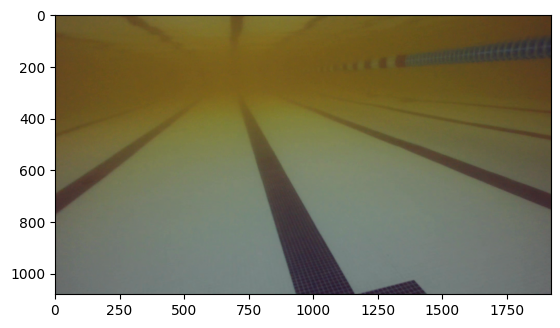

In [1014]:
plt.imshow(draw_lanes(img, d))

In [1015]:
'''count = 0
frequency = 200
newframe = []
while ret:
    if count%frequency == 0:
            #newframe.append(drawline(frame))
            plt.imshow(frame)
            plt.show(frame)
            
    count +=1
    ret, frame = cap.read()'''
    

'count = 0\nfrequency = 200\nnewframe = []\nwhile ret:\n    if count%frequency == 0:\n            #newframe.append(drawline(frame))\n            plt.imshow(frame)\n            plt.show(frame)\n            \n    count +=1\n    ret, frame = cap.read()'

In [1016]:
'''i = 0
while i < len(newframe):
   
   plt.imshow(newframe[i])
   i+=1
print(len(newframe))'''

'i = 0\nwhile i < len(newframe):\n   \n   plt.imshow(newframe[i])\n   i+=1\nprint(len(newframe))'

In [1017]:
#cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
#cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
#cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
#pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
#pts = pts.reshape((-1, 1, 2))
#cv2.polylines(img, [pts], True, (0, 255, 255), 5)
#cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


In [1018]:
'''at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
plt.imshow(color_img)'''

"at_detector = Detector(families='tag36h11',\n                       nthreads=1,\n                       quad_decimate=1.0,\n                       quad_sigma=0.0,\n                       refine_edges=1,\n                       decode_sharpening=0.25,\n                       debug=0)\ntags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)\ncolor_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)\nfor tag in tags:\n    for idx in range(len(tag.corners)):\n        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))\n\n    cv2.putText(color_img, str(tag.tag_id),\n                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),\n                fontFace=cv2.FONT_HERSHEY_SIMPLEX,\n                fontScale=0.8,\n                color=(0, 0, 255))\nplt.imshow(color_img)"

In [1019]:

'''
def find_dark_light_line(image, line_coords, direction='right', search_distance=50):
    # Extract the coordinates of the original line
    x1, y1, x2, y2 = line_coords

    # Get the direction vector of the original line
    direction_vector = np.array([x2 - x1, y2 - y1])

    # Normalize the direction vector
    direction_vector = direction_vector / np.linalg.norm(direction_vector)

    # Get the perpendicular vector to the original line
    perpendicular_vector = np.array([-direction_vector[1], direction_vector[0]])

    # Define the search direction based on the input direction parameter
    if direction == 'left':
        perpendicular_vector = -perpendicular_vector

    # Get the average color intensity of the area around the original line
    avg_intensity = np.mean(image[y1-search_distance:y1+search_distance, x1-search_distance:x1+search_distance])

    # Search for the dark area along the perpendicular direction from the original line
    dark_area_x, dark_area_y = x1, y1
    while True:
        dark_area_x += int(perpendicular_vector[0])
        dark_area_y += int(perpendicular_vector[1])

        # Stop when the intensity becomes significantly different (change the threshold as needed)
        if abs(image[dark_area_y, dark_area_x] - avg_intensity) > 50:
            break

    # Calculate the new line's start and end points
    start_point = (x1, y1)
    end_point = (dark_area_x, dark_area_y)

    # Draw the new line on a copy of the original image
    img_with_lines = image.copy()
    cv2.line(img_with_lines, start_point, end_point, (0, 255, 0), 2)

    # Show the original image and the one with the new line
    cv2.imshow('Original Image', image)
    cv2.imshow('Line Separating Dark and Light Areas', img_with_lines)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    '''


"\ndef find_dark_light_line(image, line_coords, direction='right', search_distance=50):\n    # Extract the coordinates of the original line\n    x1, y1, x2, y2 = line_coords\n\n    # Get the direction vector of the original line\n    direction_vector = np.array([x2 - x1, y2 - y1])\n\n    # Normalize the direction vector\n    direction_vector = direction_vector / np.linalg.norm(direction_vector)\n\n    # Get the perpendicular vector to the original line\n    perpendicular_vector = np.array([-direction_vector[1], direction_vector[0]])\n\n    # Define the search direction based on the input direction parameter\n    if direction == 'left':\n        perpendicular_vector = -perpendicular_vector\n\n    # Get the average color intensity of the area around the original line\n    avg_intensity = np.mean(image[y1-search_distance:y1+search_distance, x1-search_distance:x1+search_distance])\n\n    # Search for the dark area along the perpendicular direction from the original line\n    dark_area_x, d

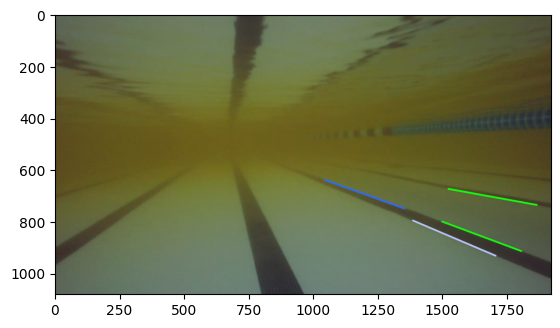

(1.3843981531192957, 1.4032652437471347)
(1.3843981531192957, 1.4032652437471347)
left


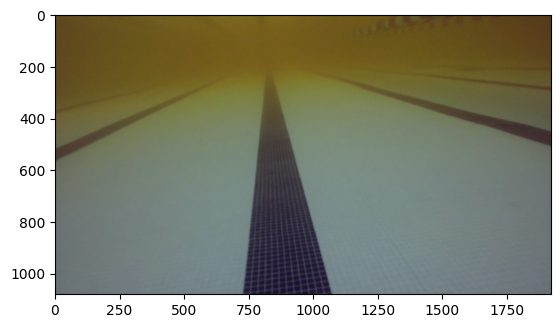

no recomended direction


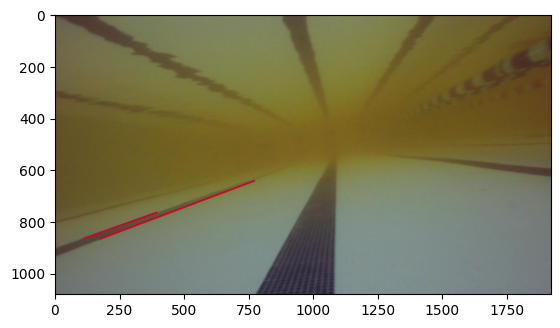

left


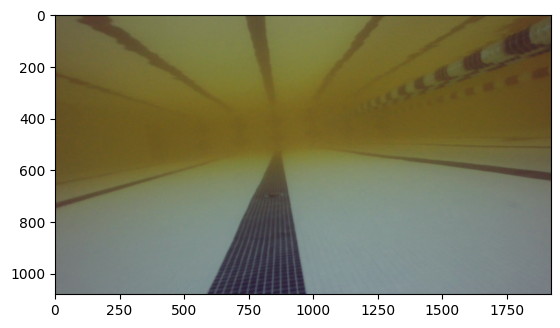

no recomended direction


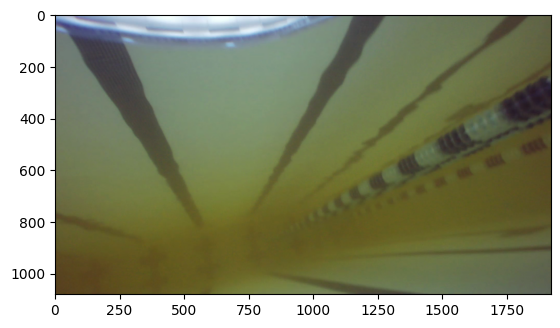

no recomended direction


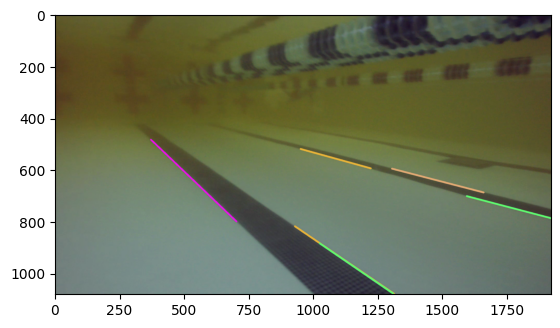

(1.4166650096109232, 1.7995846313603323)
(1.5126117792167746, 1.7995846313603323)
(1.4166650096109232, 1.7995846313603323)
(1.5126117792167746, 1.7995846313603323)
left


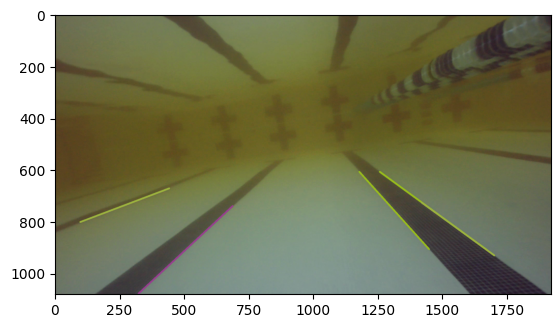

left


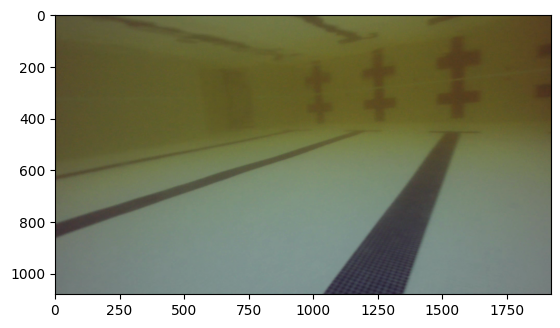

no recomended direction


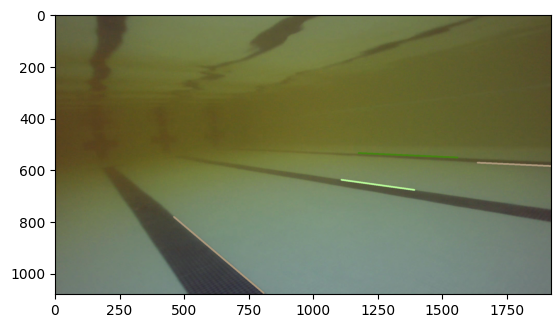

(1.3890664903458274, 1.5479071552664538)
(1.3890664903458274, 1.5479071552664538)
left


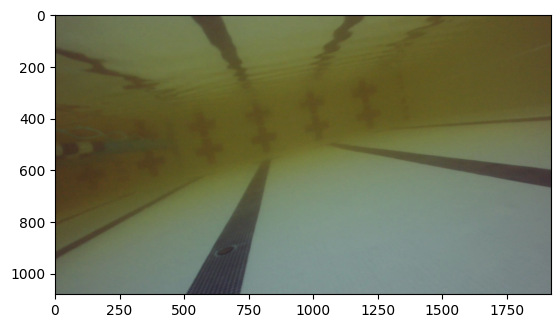

no recomended direction


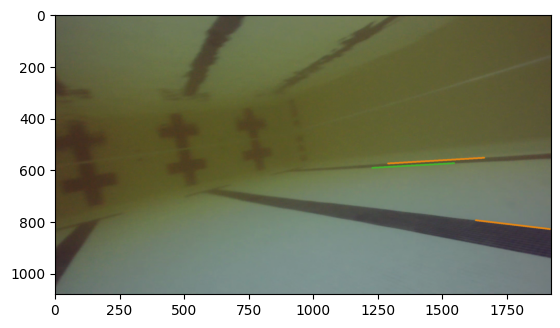

(1.417441284123837, 1.5424964343020147)
(1.4298744272866113, 1.5424964343020147)
(1.417441284123837, 1.5424964343020147)
(1.4298744272866113, 1.5424964343020147)
left


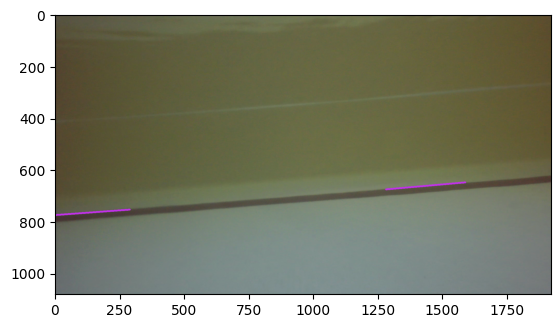

left


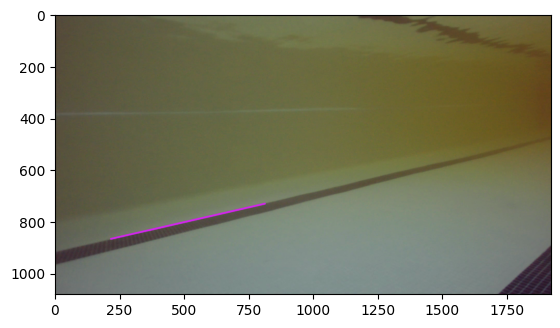

left


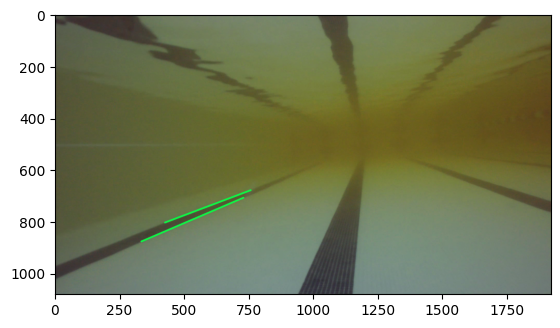

left


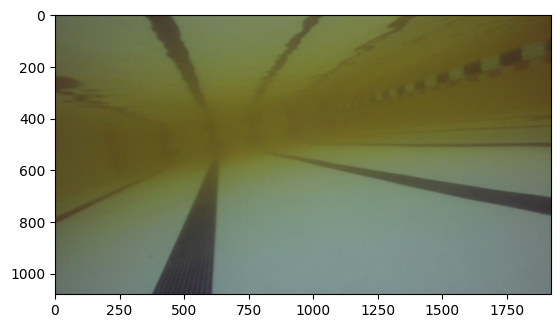

no recomended direction


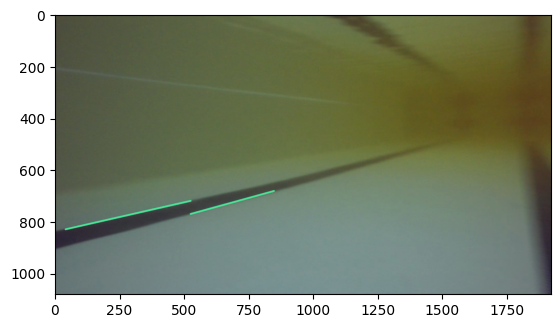

left


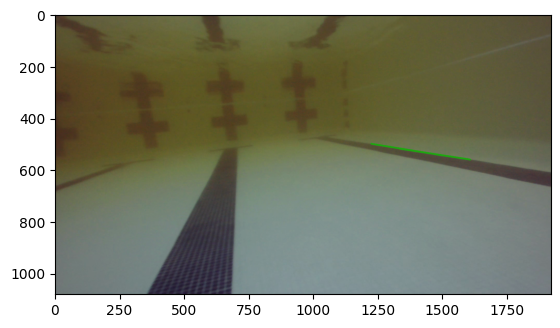

left


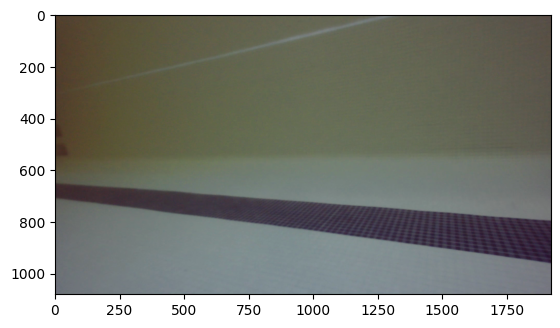

no recomended direction


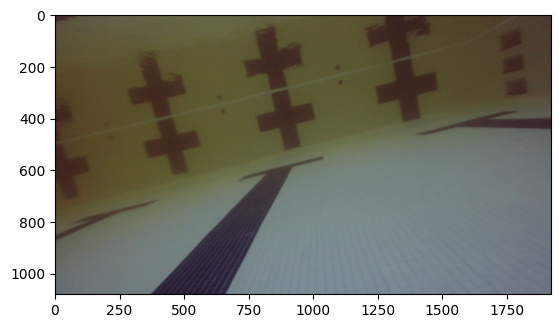

no recomended direction


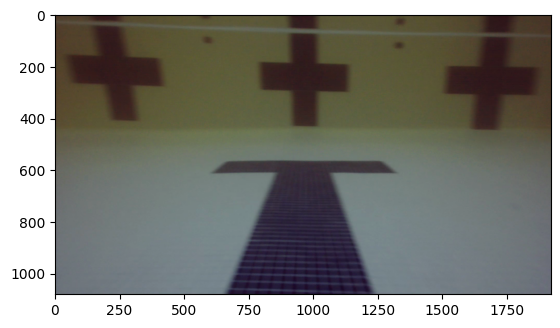

no recomended direction


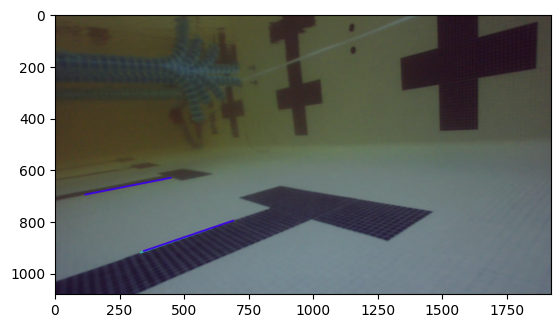

left


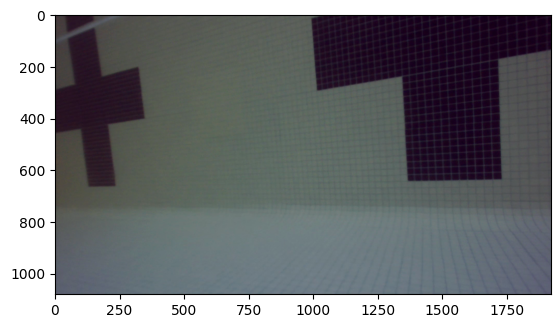

no recomended direction


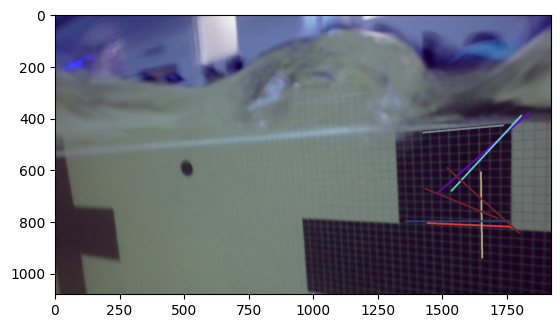

(1.4218741793161405, 1.088708396461561)
(1.5440609224500803, 1.088708396461561)
(1.7503378666582856, 1.088708396461561)
(1.4218741793161405, 1.088708396461561)
(1.5440609224500803, 1.088708396461561)
(1.7503378666582856, 1.088708396461561)
left


In [1020]:
count=0
frequency=100
pic_list=[]
while ret:
    if count%frequency==0:
        a=detect_lines(frame, 10, 30, 5)
        originalframe = frame
        
        b = detect_lanes(a)
        
        plt.imshow(draw_lanes(frame, b))
        plt.show()
        
        
        if b == None or len(b) == 0:
            print("no recomended direction")
        else:
            print(recommend_direction(get_lane_center(b)[0], get_lane_center(b)[1]))
        
        count+=1

    count+=1

    ret, frame = cap.read()

    